<a href="https://colab.research.google.com/github/Tottoro932/Neural-networks/blob/main/Lab_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Lab 0: Introduction*

In [1]:
!whoami  # ! - для выполнения кода в командной строке


root


In [2]:
!which python

/usr/local/bin/python


In [4]:
!python --version 

Python 3.7.11


In [5]:
# вводим массив слов и циклом выводим предложения с данными словами
words = ['awesome', 'amazing', 'great'] 
for w in words: 
  print('This Linux Academy lab is %s!' % w) 

This Linux Academy lab is awesome!
This Linux Academy lab is amazing!
This Linux Academy lab is great!


In [6]:
# создали список дат
myList = [0, 1, 2, 3, 4, 5] 
 
myList 

[0, 1, 2, 3, 4, 5]

In [7]:
# можем добавить в список нечто странное, например, цвет
myList.append('blue') 
 
myList  

[0, 1, 2, 3, 4, 5, 'blue']

In [9]:
print(myList[3])   # вывод третьего элемента списка
print(myList[3:])  # вывод всех элементов списка начиная с 3
print(len(myList))  # вывод длины списка (количества элементов)

3
[3, 4, 5, 'blue']
7


In [10]:
import numpy as np # библиотека для выполения научных вычислений с помощью python
np.pi # вывод числа пи

3.141592653589793

In [11]:
# вывод длины окружности
radius = 10 
circumference = 2 * np.pi * radius 
circumference  

62.83185307179586

In [12]:
# пример массива (список списков)
data = np.array([['','Col1','Col2'], 
['Row1',1,2], 
['Row2',3,4], 
['Row3',5,6]]) 
 
print(data)

[['' 'Col1' 'Col2']
 ['Row1' '1' '2']
 ['Row2' '3' '4']
 ['Row3' '5' '6']]


In [13]:
 print(data[1:,1:]) # вывод данных начиная с первой строчки 1 столбца

[['1' '2']
 ['3' '4']
 ['5' '6']]


In [14]:
# с помощью этого можно сделать красивую табличку из списка списков
import pandas as pd 

df = pd.DataFrame(data=data[1:,1:], 
index=data[1:,0], 
columns=data[0,1:]) 

df  

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6


*К нашим пингвинам...*

In [15]:
penguin_data = pd.read_csv("penguin-data.csv") # загрузили файл с ростом и весом наших пингвинов
penguin_data.shape  # вывели размер (файл содержит 20 строк и 2 столбца данных)

(20, 2)

In [21]:
penguin_data.head()  # по умолчанию без аргументов получается 5 стр

,Height,Weight
0,11,15
1,11,15
2,11,20
3,12,17
4,13,18


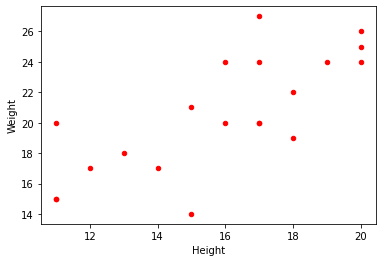

In [32]:
# импортировали библиотеку для построения графиков
%matplotlib inline
import matplotlib.pyplot as plt

# вывели график данных о наших пингвинах
penguin_data.plot(kind='scatter',x='Height',y='Weight',color='red') 

In [33]:
# из библиотеки sklearn импортируем функции
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 


In [34]:
model = LinearRegression() # создали модель линейной регрессии
model.fit(penguin_data[['Height']], penguin_data['Weight']) # обучаем модель на наших данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

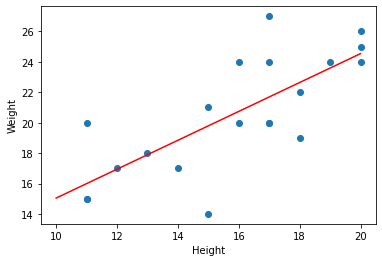

In [35]:
# хотим создать новый график, используя нашу модель
# график будет включать в себя линию наилучшего соответствия, проведенную по точкам данных

# строим наши начальные данные обучения
axes = plt.axes() 
axes.scatter(x=penguin_data['Height'], y=penguin_data['Weight']) 

# определяем наиболее подходящую линию
slope = model.coef_[0] 
intercept = model.intercept_ 

# строим нашу линию
x = np.linspace(10,20) 
y = slope*x+intercept 
axes.plot(x, y, 'r') 

# добавляем обозначения на график
axes.set_xlabel('Height') 
axes.set_ylabel('Weight') 
 
plt.show()

In [37]:
# по данному графику можно довольно точно определить вес пингвина исходя из его роста
# попробуем это сделать

height = 14 
 
# преобразуем высоту в массив
new_height = np.reshape([height],(1, -1)) 
print(new_height)
 
# передаем высоту в нашу модель для прогноза веса
weight = model.predict(new_height)[0] 
 
# выводим информацию 
print ( "If you see a penguin that's %.2f tall, you can expect it to be %.2f in weight." % (height, weight)) 

[[14]]
If you see a penguin that's 14.00 tall, you can expect it to be 18.84 in weight.


In [ ]:
# по сути мы построили модель машинного обучения, которая говорит нам, сколько будет весить пингвин в зависимости от его роста